# Pre-cooling flexibility environment testing

Purpose of this notebook is to demonstrate the 'pre-cooling' environment.

TODO - should use a dummy state csv from somewhere else (reset the state.ts after we create the env)

In [1]:
from energy_py.envs.precool.env_precool import Precool_Env

In [2]:
env = Precool_Env(lag = 0,
                 episode_length = 48,
                 cooling_adjustment_time = 4,
                 relaxation_time = 10)

Reset environment.


We reload the state infomation from a local csv - for reproducibility.

In [3]:
env.observation_ts, env.state_ts = env.load_state('state.csv', env.lag)   

We now step through the environment using a simple for loop to simulate the actions of an agent.  

In [4]:
for i in range(env.episode_length):
    action = 0
    
    if i > 30:
        action = 1
        
    env.step(action)

step is 0
pre-cooling history deque([], maxlen=4)
post-cooling history deque([], maxlen=4)
relaxation history deque([], maxlen=10)
nothing is happening
demand adjustment is 0
step is 1
pre-cooling history deque([0], maxlen=4)
post-cooling history deque([0], maxlen=4)
relaxation history deque([0], maxlen=10)
nothing is happening
demand adjustment is 0
step is 2
pre-cooling history deque([0, 0], maxlen=4)
post-cooling history deque([0, 0], maxlen=4)
relaxation history deque([0, 0], maxlen=10)
nothing is happening
demand adjustment is 0
step is 3
pre-cooling history deque([0, 0, 0], maxlen=4)
post-cooling history deque([0, 0, 0], maxlen=4)
relaxation history deque([0, 0, 0], maxlen=10)
nothing is happening
demand adjustment is 0
step is 4
pre-cooling history deque([0, 0, 0, 0], maxlen=4)
post-cooling history deque([0, 0, 0, 0], maxlen=4)
relaxation history deque([0, 0, 0, 0], maxlen=10)
nothing is happening
demand adjustment is 0
step is 5
pre-cooling history deque([0, 0, 0, 0], maxlen=4)

Now taking a look at the outputs of this run

In [5]:
outputs = env.output_info()

total cooling demand was 369.19404603400005
total adjusted demand was 369.19404603400005
RL cost was 1465.9137943633332
BAU cost was 1621.4569755633333
Savings were 155.54318120000016


Note that
- total cooling demand was equal for both cases (i.e. we generate the same amount of cooling for both)
- the RL cost is less than the BAU cost - because we operated our flexiblity action at the correct time

We can now take a look at some charts.  Figure 1 shows the cooling balance for the two cases:

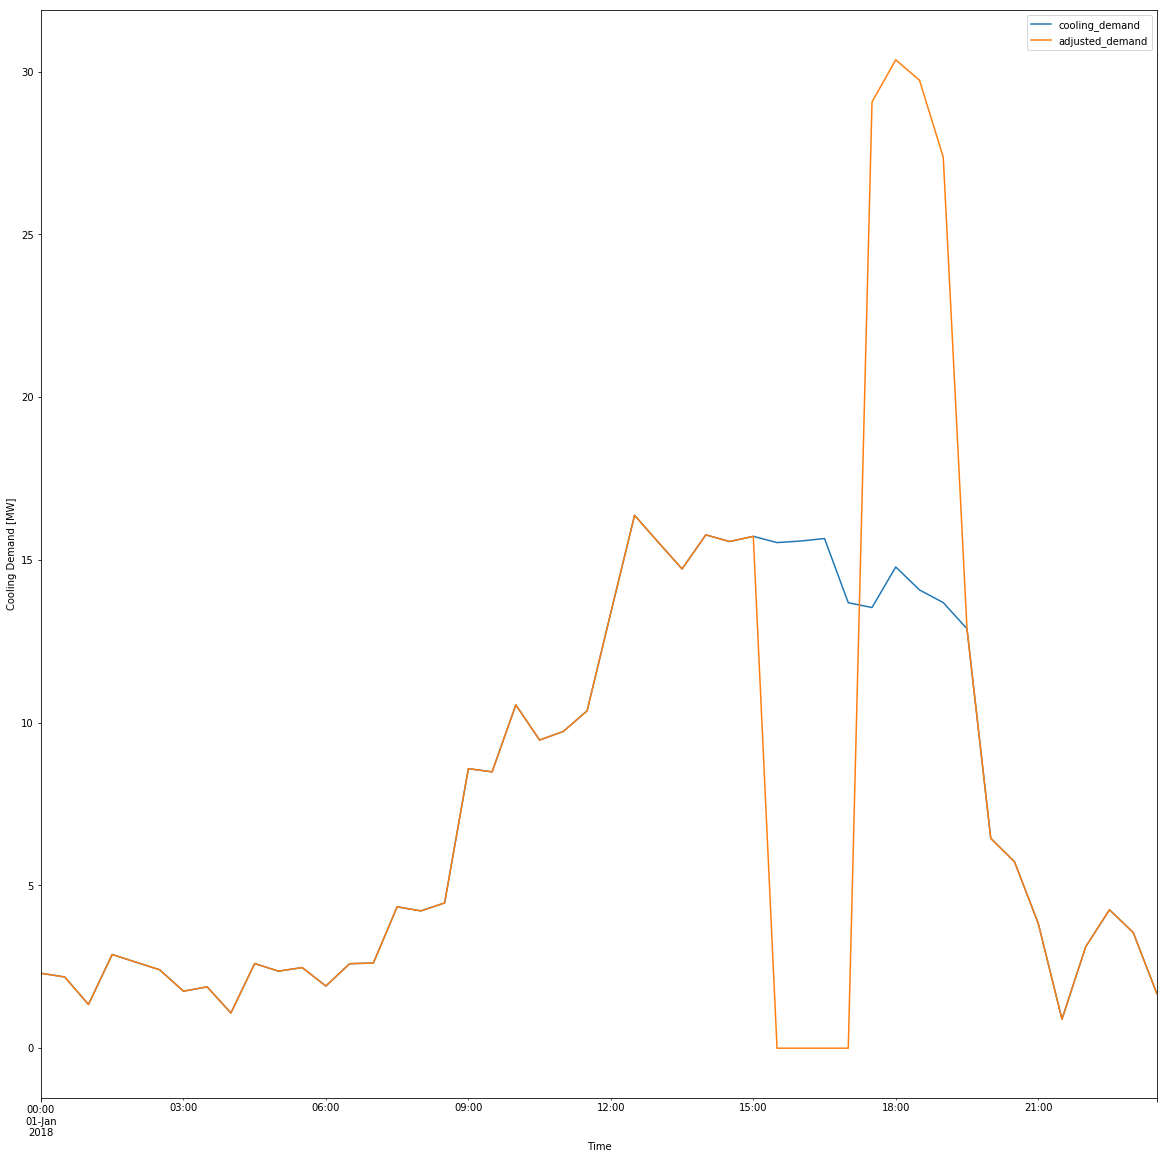

In [6]:
fig1 = outputs['cooling_demand_fig']
fig1

Figure 2 shows the economics for both cases - i.e. the cost to generate cooling throughout the day.

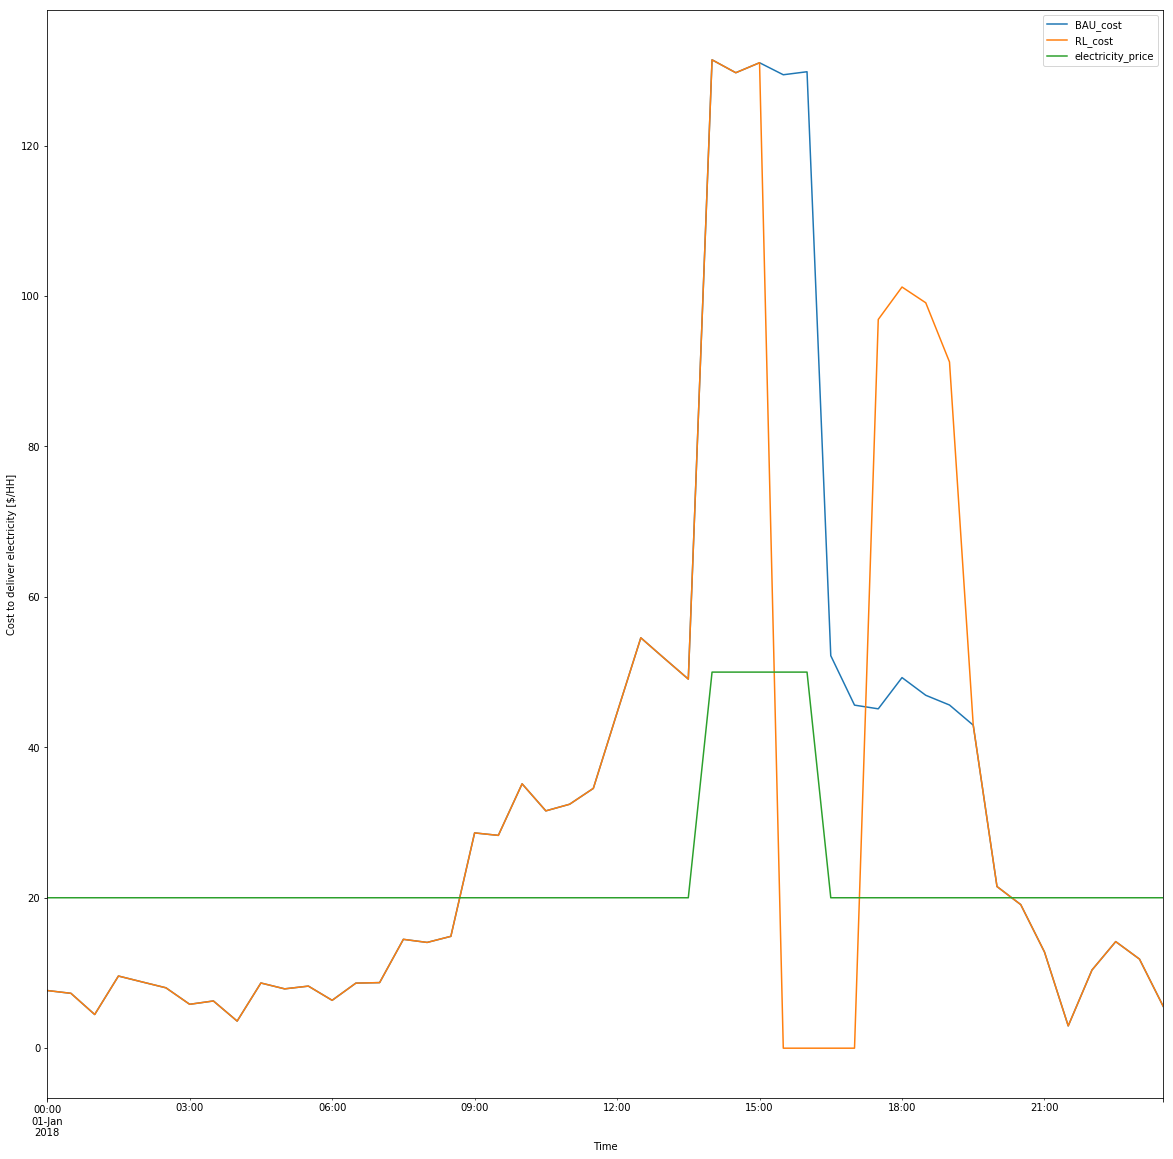

In [7]:
fig2 = outputs['cost_fig']
fig2